In [26]:
import torch
import torch.nn as nn
from torchvision.models import resnet18
import os
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Define the ResNet18ForCIFAR10 class
class ResNet18ForCIFAR10(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18ForCIFAR10, self).__init__()
        self.model = resnet18(pretrained=False)
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)  # Adjust for CIFAR10
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

In [21]:
def load_and_inspect_model(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return
    
    # Load the .pt file
    model_data = torch.load(file_path, map_location=torch.device("cpu"))
    
    # Check if the .pt file contains a full model or just a state_dict
    if isinstance(model_data, nn.Module):
        print("Loaded a complete model.\n")
        # print(model_data)  # Print the model architecture

        # Print weights
        # print("\nInspecting model parameters:\n")
        # for name, param in model_data.named_parameters():
        #     print(f"Layer: {name} | Shape: {param.shape}")
        #     print(param)  # Print the actual weights
        weights = []
    
        # Loop through all parameters of the model
        for param in model_data.parameters():
            weights.append(param.detach().cpu().numpy().flatten())  # Convert to NumPy and flatten
        
        # Concatenate all weights into a single 1D array
        flat_weights = np.concatenate(weights)
        return flat_weights

    else:
        print("The .pt file content is neither a full model nor a state_dict. Please check the file format.")

In [22]:
# usage
file_path = "quantized_models/resnet18/dsCIFAR10_b4_batch256_mlpscalar1.16_cnnscalar1.16_mlppercentile1_cnnpercentile1_retain_rate0.25_regNone_lambda0.1.pt"  # Replace with the path to your .pt file
weights_1d = load_and_inspect_model(file_path)

Loaded a complete model.



Text(0, 0.5, 'Frequency')

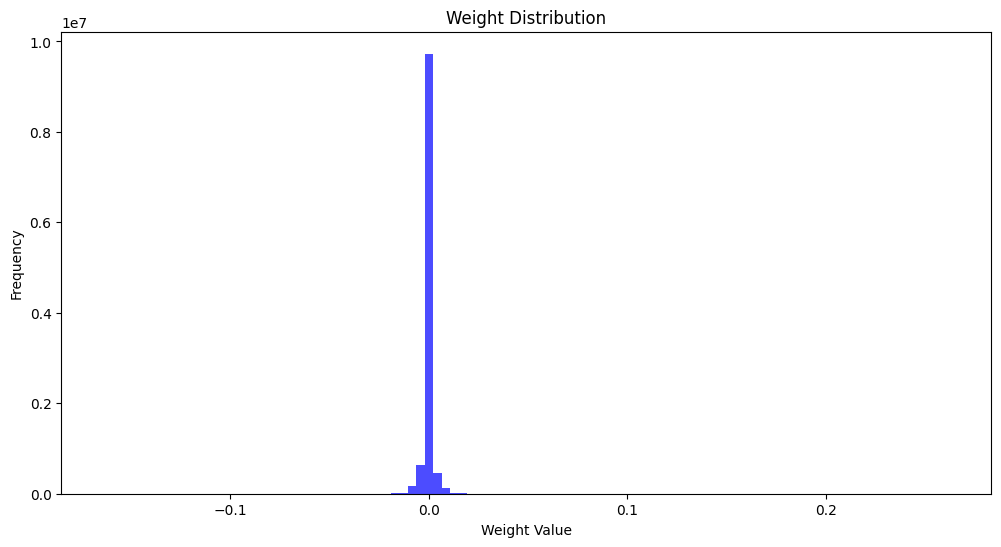

In [32]:
# visualize the weights distribution with a bar plot

plt.figure(figsize=(12, 6))
plt.hist(weights_1d, bins=100, color="blue", alpha=0.7)
plt.title("Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")